In [12]:
import pandas as pd
import numpy as np
import keras as kr

data = pd.read_csv('earthquakes_scaled_class.csv', index_col="index")

data = data.drop("index.1", axis=1)

data

,magnitude,time,updated,felt,cdi,mmi,tsunami,sig,nst,dmin,...,gap,magType,depth,latitude,longitude,distanceKM,continent,country,subnational,city
index,,,,,,,,,,,,,,,,,,,,,
us6000lcz2,5,-0.815799,-0.977412,-0.083333,-0.6,-1.0,0.0,0.000000,0.491667,1.290504,...,0.105263,0.25,0.000000,-0.126122,0.902897,-0.804348,0.5,0.275862,0.129630,0.234432
us6000n9xs,4,0.289580,0.000423,-0.083333,-0.6,0.0,0.0,-0.919014,-0.608333,-0.232505,...,1.526316,-0.75,0.001914,0.000000,-0.153676,0.369565,0.0,0.000000,0.000000,0.000000
tx2024mydx,4,0.289510,0.349996,-0.083333,-0.6,0.0,0.0,-0.838028,-0.583333,-0.295730,...,0.315789,-0.75,-0.149192,0.000098,-0.153676,0.369565,0.0,0.000000,0.000000,0.000000
us6000n9xf,4,0.289510,0.000343,-0.083333,-0.6,0.0,0.0,-0.799296,-0.608333,-0.228936,...,1.657895,-0.75,-0.043131,0.000601,-0.153707,0.391304,0.0,0.000000,0.000000,0.000000
nn00880145,4,0.278268,0.311118,-0.083333,-0.6,-1.0,0.0,-0.919014,-0.775000,0.137667,...,0.022105,-0.75,-0.092003,0.580415,-0.207513,-0.086957,0.0,0.000000,-0.666667,-2.021978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ci40731623,5,0.580644,0.377703,774.583333,0.4,1.0,1.0,1.299296,0.358333,-0.330208,...,1.368421,-0.50,0.049682,0.180617,-0.216912,-0.673913,0.0,0.000000,-1.555556,-0.952381
ci40699207,4,0.455449,0.368965,1009.375000,0.4,1.0,1.0,1.362676,0.750000,-0.329897,...,-0.657895,-0.50,0.036065,0.181669,-0.214216,-0.717391,0.0,0.000000,-1.555556,-0.952381
ci40699207,4,0.455449,0.368965,1009.375000,0.4,1.0,1.0,1.362676,0.750000,-0.329897,...,-0.657895,-0.50,0.036065,0.181669,-0.214216,-0.717391,0.0,0.000000,-1.555556,-0.952381


In [13]:
data["magnitude"].unique()

array([5, 4, 3, 6, 7, 8], dtype=int64)

In [14]:
model = kr.models.Sequential()

model.add(kr.layers.Dense(50, input_dim=20, activation="relu", kernel_initializer="he_normal"))
model.add(kr.layers.BatchNormalization())
model.add(kr.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(kr.layers.BatchNormalization())
model.add(kr.layers.Dense(150, activation="relu", kernel_initializer="he_normal"))
model.add(kr.layers.BatchNormalization())
model.add(kr.layers.Dense(250, activation="relu", kernel_initializer="he_normal"))
model.add(kr.layers.BatchNormalization())
model.add(kr.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(kr.layers.BatchNormalization())
model.add(kr.layers.Dense(6, activation="softmax", kernel_initializer="he_normal"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

C:\Users\mario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
data["magnitude"] = data["magnitude"].map(lambda x: x - 3)
data

,magnitude,time,updated,felt,cdi,mmi,tsunami,sig,nst,dmin,...,gap,magType,depth,latitude,longitude,distanceKM,continent,country,subnational,city
index,,,,,,,,,,,,,,,,,,,,,
us6000lcz2,2,-0.815799,-0.977412,-0.083333,-0.6,-1.0,0.0,0.000000,0.491667,1.290504,...,0.105263,0.25,0.000000,-0.126122,0.902897,-0.804348,0.5,0.275862,0.129630,0.234432
us6000n9xs,1,0.289580,0.000423,-0.083333,-0.6,0.0,0.0,-0.919014,-0.608333,-0.232505,...,1.526316,-0.75,0.001914,0.000000,-0.153676,0.369565,0.0,0.000000,0.000000,0.000000
tx2024mydx,1,0.289510,0.349996,-0.083333,-0.6,0.0,0.0,-0.838028,-0.583333,-0.295730,...,0.315789,-0.75,-0.149192,0.000098,-0.153676,0.369565,0.0,0.000000,0.000000,0.000000
us6000n9xf,1,0.289510,0.000343,-0.083333,-0.6,0.0,0.0,-0.799296,-0.608333,-0.228936,...,1.657895,-0.75,-0.043131,0.000601,-0.153707,0.391304,0.0,0.000000,0.000000,0.000000
nn00880145,1,0.278268,0.311118,-0.083333,-0.6,-1.0,0.0,-0.919014,-0.775000,0.137667,...,0.022105,-0.75,-0.092003,0.580415,-0.207513,-0.086957,0.0,0.000000,-0.666667,-2.021978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ci40731623,2,0.580644,0.377703,774.583333,0.4,1.0,1.0,1.299296,0.358333,-0.330208,...,1.368421,-0.50,0.049682,0.180617,-0.216912,-0.673913,0.0,0.000000,-1.555556,-0.952381
ci40699207,1,0.455449,0.368965,1009.375000,0.4,1.0,1.0,1.362676,0.750000,-0.329897,...,-0.657895,-0.50,0.036065,0.181669,-0.214216,-0.717391,0.0,0.000000,-1.555556,-0.952381
ci40699207,1,0.455449,0.368965,1009.375000,0.4,1.0,1.0,1.362676,0.750000,-0.329897,...,-0.657895,-0.50,0.036065,0.181669,-0.214216,-0.717391,0.0,0.000000,-1.555556,-0.952381


In [16]:
print(data[data["magnitude"] == 0].shape, data[data["magnitude"] == 1].shape, data[data["magnitude"] == 2].shape, 
      data[data["magnitude"] == 3].shape, data[data["magnitude"] == 4].shape, data[data["magnitude"] == 5].shape)   

(128, 21) (323, 21) (267, 21) (389, 21) (24, 21) (5, 21)


In [17]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.15, random_state=40, stratify=data["magnitude"])

train_x = train.drop("magnitude", axis=1)
train_y = train["magnitude"]

test_x = test.drop("magnitude", axis=1)
test_y = test["magnitude"]

history = model.fit(train_x, pd.get_dummies(train_y), epochs=500, batch_size=48)

Epoch 1/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3510 - loss: 1.8987
Epoch 2/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7202 - loss: 0.7182 
Epoch 3/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7296 - loss: 0.6825 
Epoch 4/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7506 - loss: 0.6453 
Epoch 5/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7928 - loss: 0.5464 
Epoch 6/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7977 - loss: 0.4908
Epoch 7/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8136 - loss: 0.4762
Epoch 8/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8314 - loss: 0.4749
Epoch 9/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8333 - loss: 0.4279
Epoch 10/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8359 - loss: 0.3967 
Epoch 11/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8558 - loss: 0.3902 
Epoch 12/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - ac

(0.0, 1.0)

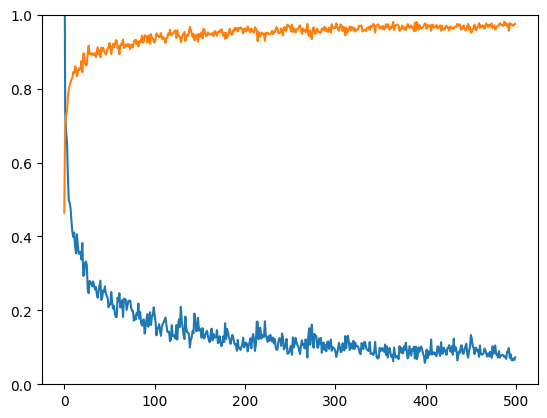

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["accuracy"])
plt.ylim(0, 1)


In [25]:
model.evaluate(test_x, pd.get_dummies(test_y))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9615 - loss: 0.1837  


[0.22315086424350739, 0.9415204524993896]

In [26]:
#I want to predict the classes of the test data

predictions = model.predict(test_x)

predictions = np.argmax(predictions, axis=1)

predictions

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([1, 1, 3, 2, 3, 0, 3, 3, 2, 1, 1, 3, 1, 3, 1, 2, 3, 3, 0, 2, 1, 3,
       1, 1, 0, 0, 0, 2, 2, 1, 2, 3, 3, 1, 2, 5, 4, 0, 2, 1, 2, 1, 1, 3,
       3, 0, 1, 1, 3, 3, 2, 3, 0, 3, 3, 1, 1, 0, 1, 3, 3, 1, 3, 3, 3, 0,
       1, 3, 2, 2, 3, 3, 3, 1, 2, 3, 3, 3, 2, 1, 2, 3, 3, 2, 0, 1, 1, 4,
       3, 2, 1, 1, 3, 2, 3, 1, 1, 1, 1, 3, 1, 0, 2, 1, 2, 4, 1, 3, 2, 3,
       0, 2, 1, 1, 3, 3, 3, 0, 2, 1, 1, 2, 3, 3, 1, 2, 2, 1, 2, 3, 1, 2,
       3, 2, 3, 1, 2, 2, 3, 2, 3, 1, 3, 0, 1, 2, 3, 3, 1, 1, 3, 1, 2, 1,
       3, 4, 3, 1, 2, 3, 3, 0, 0, 3, 3, 3, 2, 1, 0, 3, 3], dtype=int64)

In [27]:
#I want a confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_y, np.argmax(model.predict(test_x), axis=1))
conf_matrix

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[18,  1,  0,  0,  0,  0],
       [ 0, 49,  0,  0,  0,  0],
       [ 0,  0, 34,  6,  0,  0],
       [ 0,  0,  3, 55,  0,  0],
       [ 0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  0,  1]], dtype=int64)

In [22]:
from sklearn.metrics import classification_report

print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.98      1.00      0.99        49
           2       0.92      0.85      0.88        40
           3       0.90      0.95      0.92        58
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1

    accuracy                           0.94       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.94      0.94      0.94       171



APLYING SMOTE TO TRY TO IMPROVE PERFORMANCE BY BALANCING THE NUMBER OF DATA IN EACH CLASS

In [45]:
from imblearn.over_sampling import SMOTE as smote

from collections import Counter
print("Distribución original de las clases:", Counter(data["magnitude"]))

# Dividir en conjunto de entrenamiento y conjunto de prueba
train, test = train_test_split(data, test_size=0.20, random_state=42)

train_x = train.drop("magnitude", axis=1)
train_y = train["magnitude"]

test_x = test.drop("magnitude", axis=1)
test_y = test["magnitude"]

# Ver la distribución de clases en el conjunto de entrenamiento antes de aplicar SMOTE
print("Distribución de clases en entrenamiento antes de SMOTE:", Counter(train_y))
print("Distribución de clases en entrenamiento antes de SMOTE:", Counter(test_y))

# Aplicar SMOTE en el conjunto de entrenamiento para balancear las clases
smote = smote(random_state=42, k_neighbors=2)
X_train_smote, y_train_smote = smote.fit_resample(train_x, train_y)
X_test_smote, y_test_smote = smote.fit_resample(test_x, test_y)

# Ver la distribución de clases después de aplicar SMOTE
print("Distribución de clases en entrenamiento después de SMOTE:", Counter(y_train_smote))
print("Distribución de clases en entrenamiento después de SMOTE:", Counter(y_test_smote))

Distribución original de las clases: Counter({3: 389, 1: 323, 2: 267, 0: 128, 4: 24, 5: 5})
Distribución de clases en entrenamiento antes de SMOTE: Counter({3: 309, 1: 265, 2: 206, 0: 102, 4: 21, 5: 5})
Distribución de clases en entrenamiento antes de SMOTE: Counter({3: 80, 2: 61, 1: 58, 0: 26, 4: 3})
Distribución de clases en entrenamiento después de SMOTE: Counter({1: 309, 2: 309, 3: 309, 0: 309, 4: 309, 5: 309})
Distribución de clases en entrenamiento después de SMOTE: Counter({1: 80, 3: 80, 2: 80, 4: 80, 0: 80})


In [46]:
model = kr.models.Sequential()

model.add(kr.layers.Dense(50, input_dim=20, activation="relu", kernel_initializer="he_normal"))
model.add(kr.layers.BatchNormalization())
model.add(kr.layers.Dense(150, activation="relu", kernel_initializer="he_normal"))
model.add(kr.layers.BatchNormalization())
model.add(kr.layers.Dense(400, activation="relu", kernel_initializer="he_normal"))
model.add(kr.layers.BatchNormalization())
model.add(kr.layers.Dense(841, activation="relu", kernel_initializer="he_normal"))
model.add(kr.layers.BatchNormalization())
model.add(kr.layers.Dense(450, activation="relu", kernel_initializer="he_normal"))
model.add(kr.layers.BatchNormalization())
model.add(kr.layers.Dense(200, activation="relu", kernel_initializer="he_normal"))
model.add(kr.layers.BatchNormalization())
model.add(kr.layers.Dense(6, activation="softmax", kernel_initializer="he_normal"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

C:\Users\mario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
history = model.fit(train_x, pd.get_dummies(train_y), epochs=500, batch_size=48)

Epoch 1/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9690 - loss: 0.0840 
Epoch 2/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9702 - loss: 0.0846 
Epoch 3/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9606 - loss: 0.0835 
Epoch 4/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9737 - loss: 0.0578 
Epoch 5/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9514 - loss: 0.1177 
Epoch 6/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9692 - loss: 0.1011 
Epoch 7/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9717 - loss: 0.0696 
Epoch 8/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9758 - loss: 0.0713 
Epoch 9/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9585 - loss: 0.0960 
Epoch 10/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9668 - loss: 0.0796 
Epoch 11/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9775 - loss: 0.0668 
Epoch 12/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

(0.0, 1.0)

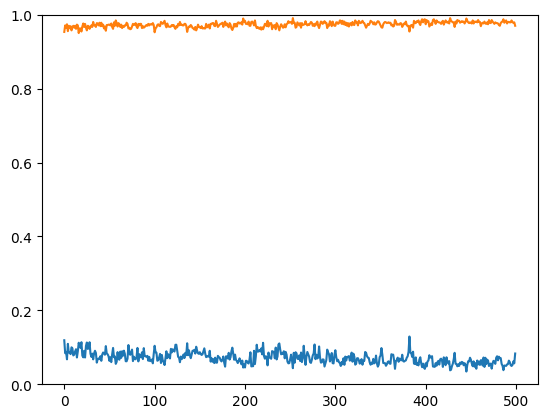

In [35]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["accuracy"])
plt.ylim(0, 1)

In [40]:
predictions = model.predict(X_test_smote)

predictions = np.argmax(predictions, axis=1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [42]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test_smote, np.argmax(model.predict(X_test_smote), axis=1))
conf_matrix

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[53,  6,  0,  0,  0],
       [ 0, 59,  0,  0,  0],
       [ 0,  1, 54,  4,  0],
       [ 0,  0,  2, 56,  1],
       [ 0,  0,  0, 10, 49]], dtype=int64)

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test_smote, predictions))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        59
           1       0.89      1.00      0.94        59
           2       0.96      0.92      0.94        59
           3       0.80      0.95      0.87        59
           4       0.98      0.83      0.90        59

    accuracy                           0.92       295
   macro avg       0.93      0.92      0.92       295
weighted avg       0.93      0.92      0.92       295

